# Single Layer Neural Network Example

Builds a simple neural network with Keras ([code](../examples/mnist/mnist0.py))

### MNIST Dataset Overview

The MNIST database is a large dataset of handwritten digits used for training image processing algorthms. This data set has 50,000 training example images, and 10,000 testing images. Each image has been flatted from an array of size (28,28) to a 1-D numpy array with 784 features (28 * 28). 

### Code Overview:
1. Import libraries
2. Import data for training and testing 
3. Define Model
4. Define Loss function
5. Define Training procedure
6. Run Model code 
    a. Train model
    b. Test model
7. Plot accuracy of results

## Example Code

import libraries

In [1]:
from __future__ import absolute_import, division, print_function
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import time 
import tensorflow as tf
import matplotlib.pyplot as plt
mnist = tf.keras.datasets.mnist

Set training and network parameters

In [2]:
# Training Parameters
epochs = 10

# Network Parameters
NUM_INPUTS = 784
NUM_OUTPUTS = 10 

Import mnist data and preprocess data

In [3]:
# Import Dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
x_train = x_train.reshape(-1, NUM_INPUTS)
x_test = x_test.reshape (-1, NUM_INPUTS)

Define model

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(NUM_OUTPUTS, activation='softmax', input_dim=NUM_INPUTS))

Define optimizer, loss
Compile model

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['categorical_accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Train model

In [6]:
history = model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 107us/sample - loss: 0.5057 - categorical_accuracy: 0.8695 - val_loss: 0.3161 - val_categorical_accuracy: 0.9150
Epoch 2/10
48000/48000 [==============================] - 5s 97us/sample - loss: 0.3179 - categorical_accuracy: 0.9117 - val_loss: 0.2841 - val_categorical_accuracy: 0.9209
Epoch 3/10
48000/48000 [==============================] - 5s 95us/sample - loss: 0.2929 - categorical_accuracy: 0.9184 - val_loss: 0.2752 - val_categorical_accuracy: 0.9243
Epoch 4/10
48000/48000 [==============================] - 5s 102us/sample - loss: 0.2817 - categorical_accuracy: 0.9210 - val_loss: 0.2711 - val_categorical_accuracy: 0.9249
Epoch 5/10
48000/48000 [==============================] - 5s 103us/sample - loss: 0.2735 - categorical_accuracy: 0.9233 - val_loss: 0.2708 - val_categorical_accuracy: 0.9259
Epoch 6/10
48000/48000 [==============================] - 5s 104us/sample - loss: 

Test Model

In [7]:
evaluation = model.evaluate(x_test, y_test, verbose=0)

Plot Model Accuracy

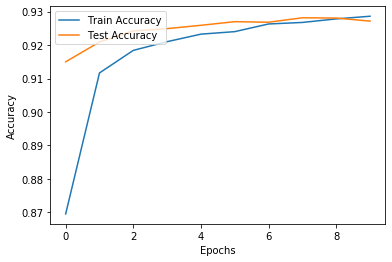

In [8]:
# Plot Accuracy 
plt.plot(history.history["categorical_accuracy"])
plt.plot(history.history["val_categorical_accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train Accuracy", "Test Accuracy"], loc="upper left")
plt.show();